In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre training stuff

In [2]:
labels = np.load('/content/drive/My Drive/Colab Notebooks/labels.npy')
audios = np.load('/content/drive/My Drive/Colab Notebooks/audios.npy')

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
import scipy
from scipy import signal, fft
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import cv2
import time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
import librosa

In [4]:
mfccs=[]
chroma=[]
rms=[]
zcr=[]
#338368 is divisible by 544
hl=544
sr=22050

for fin in audios:
    mfcc = librosa.feature.mfcc(y=fin, sr=sr, S=None, n_mfcc=20,hop_length=hl)
    chrom = librosa.feature.chroma_stft(y=fin, sr=sr,hop_length=hl)
    rms1 = librosa.feature.rms(y=fin,hop_length=hl) 
    zcr1 = librosa.feature.zero_crossing_rate(y=fin, hop_length=hl)
    
    mfccs.append(mfcc)
    chroma.append(chrom)
    rms.append(rms1)
    zcr.append(zcr1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mfcc_arr = np.swapaxes(np.asarray(mfccs).astype('float32'), 1, 2)
chroma_arr = np.swapaxes(np.asarray(chroma).astype('float32'), 1, 2)
rms_arr = np.swapaxes(np.asarray(rms).astype('float32'), 1, 2)
zcr_arr = np.swapaxes(np.asarray(zcr).astype('float32'), 1, 2)

X = np.concatenate((mfcc_arr, chroma_arr, rms_arr, zcr_arr), axis=2)
Y = np.asarray(labels)


mask = np.logical_or(labels=='other', labels=='X')

Y = Y[~mask]
X = X[~mask]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

X_train.shape

# Eval

In [2]:
# Eval

In [ ]:
Xb_train = X_train.reshape((len(X_train), 623*34))
Xb_test = X_test.reshape((len(X_test), 623*34))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

svm2 = SVC(C=10, gamma= 'scale', kernel='rbf')
svm2.fit(Xb_train, y_train)
svm2_pred = svm2.predict(Xb_test)
accuracy = accuracy_score(y_true=y_test, y_pred=svm2_pred)
f1 = f1_score(y_true=y_test, y_pred=svm2_pred, average='macro')
uar = recall_score(y_true=y_test, y_pred=svm2_pred, average='macro')

print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Unweighted Average Recall:', uar)


Accuracy: 0.5180327868852459
F1 score: 0.445440372957025
Unweighted Average Recall: 0.44183777167865884


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, label_binarize


y_true = label_binarize(y_test, classes=['angry', 'happy', 'sad', 'neutral',])
y_pred = label_binarize(svm2_pred, classes=['angry', 'happy', 'sad', 'neutral',])

# Get classification report including precision, recall, f1-score, and support
report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.44      0.41      0.42        68
           1       0.43      0.29      0.35        65
           2       0.48      0.26      0.34        50
           3       0.58      0.80      0.67       122

   micro avg       0.52      0.52      0.52       305
   macro avg       0.48      0.44      0.45       305
weighted avg       0.50      0.52      0.49       305
 samples avg       0.52      0.52      0.52       305



# Eval 2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=3)

X_train.shape

Xb_train = X_train.reshape((len(X_train), 623*34))
Xb_test = X_test.reshape((len(X_test), 623*34))

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

svm2 = SVC(C=10, gamma= 'scale', kernel='rbf')
svm2.fit(Xb_train, y_train)
svm2_pred = svm2.predict(Xb_test)
accuracy = accuracy_score(y_true=y_test, y_pred=svm2_pred)
f1 = f1_score(y_true=y_test, y_pred=svm2_pred, average='macro')
uar = recall_score(y_true=y_test, y_pred=svm2_pred, average='macro')

print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Unweighted Average Recall:', uar)


Accuracy: 0.5049180327868853
F1 score: 0.4353255639215764
Unweighted Average Recall: 0.4296679442921448


In [8]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, label_binarize


y_arg = label_binarize(y_test, classes=['angry', 'happy', 'sad', 'neutral',])
y_pred = label_binarize(svm2_pred, classes=['angry', 'happy', 'sad', 'neutral',])

class_names = ['angry', 'happy', 'sad', 'neutral']

# Compute the classification report
report = classification_report(y_arg, y_pred, target_names=class_names, output_dict=True)

# Convert the report to a dataframe
df_report = pd.DataFrame(report).transpose()

# Convert the decimals to percentages with 2 decimal places (excluding the last column)
df_report.iloc[:,:-1] = df_report.iloc[:,:-1].applymap(lambda x: f'{x:.2%}' if isinstance(x, float) else x)

# Style the dataframe
df_report = df_report.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_precision(2)

# Display the dataframe
display(df_report)

<ipython-input-8-bc46de39cf24>:20: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_report = df_report.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_precision(2)


,precision,recall,f1-score,support
angry,44.62%,40.28%,42.34%,72.00
happy,34.69%,34.69%,34.69%,49.00
sad,44.83%,26.00%,32.91%,50.00
neutral,58.64%,70.90%,64.19%,134.00
micro avg,50.49%,50.49%,50.49%,305.00
macro avg,45.69%,42.97%,43.53%,305.00
weighted avg,49.22%,50.49%,49.16%,305.00
samples avg,50.49%,50.49%,50.49%,305.00


array([3, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0, 0, 3, 1,
       3, 1, 0, 3, 3, 3, 1, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3,
       3, 3, 3, 0, 2, 3, 0, 3, 1, 2, 0, 2, 0, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       2, 3, 0, 3, 3, 3, 3, 1, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0,
       1, 3, 3, 0, 3, 0, 3, 3, 0, 0, 1, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 1,
       3, 1, 3, 3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3, 2, 2, 3,
       3, 0, 1, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 0, 3, 3, 1, 3, 1, 1, 0, 3,
       3, 2, 3, 3, 3, 1, 3, 3, 3, 0, 3, 2, 0, 1, 0, 0, 1, 0, 3, 1, 3, 1,
       1, 0, 0, 1, 1, 3, 3, 3, 2, 3, 0, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0, 2,
       3, 0, 3, 3, 3, 3, 3, 1, 0, 2, 2, 2, 3, 1, 0, 3, 2, 1, 3, 3, 3, 1,
       3, 0, 0, 3, 0, 1, 3, 0, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       2, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 3, 3, 3, 1, 3, 3, 3, 0, 2, 1,
       1, 2, 3, 3, 0, 1, 0, 1, 3, 3, 3, 3, 3, 2, 2,

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

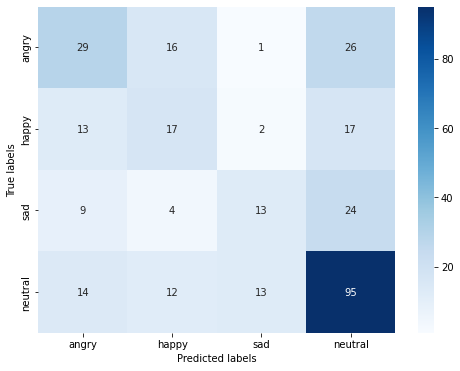

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class names
class_names = ['angry', 'happy', 'sad', 'neutral']
y_arg = np.argmax(y_arg, axis=1)
y_pred = np.argmax(y_pred, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_arg, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Eval 3

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=4)

X_train.shape

Xb_train = X_train.reshape((len(X_train), 623*34))
Xb_test = X_test.reshape((len(X_test), 623*34))

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

svm2 = SVC(C=10, gamma= 'scale', kernel='rbf')
svm2.fit(Xb_train, y_train)
svm2_pred = svm2.predict(Xb_test)
accuracy = accuracy_score(y_true=y_test, y_pred=svm2_pred)
f1 = f1_score(y_true=y_test, y_pred=svm2_pred, average='macro')
uar = recall_score(y_true=y_test, y_pred=svm2_pred, average='macro')

print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Unweighted Average Recall:', uar)


Accuracy: 0.5081967213114754
F1 score: 0.4393925808156918
Unweighted Average Recall: 0.43588748935134475


In [19]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, label_binarize


y_arg = label_binarize(y_test, classes=['angry', 'happy', 'sad', 'neutral',])
y_pred = label_binarize(svm2_pred, classes=['angry', 'happy', 'sad', 'neutral',])

class_names = ['angry', 'happy', 'sad', 'neutral']

# Compute the classification report
report = classification_report(y_arg, y_pred, target_names=class_names, output_dict=True)

# Convert the report to a dataframe
df_report = pd.DataFrame(report).transpose()

# Convert the decimals to percentages with 2 decimal places (excluding the last column)
df_report.iloc[:,:-1] = df_report.iloc[:,:-1].applymap(lambda x: f'{x:.2%}' if isinstance(x, float) else x)

# Style the dataframe
df_report = df_report.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_precision(2)

# Display the dataframe
display(df_report)

<ipython-input-19-bc46de39cf24>:20: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_report = df_report.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_precision(2)


,precision,recall,f1-score,support
angry,58.93%,39.76%,47.48%,83.00
happy,36.59%,27.78%,31.58%,54.00
sad,33.33%,31.82%,32.56%,44.00
neutral,56.02%,75.00%,64.14%,124.00
micro avg,50.82%,50.82%,50.82%,305.00
macro avg,46.22%,43.59%,43.94%,305.00
weighted avg,50.10%,50.82%,49.29%,305.00
samples avg,50.82%,50.82%,50.82%,305.00


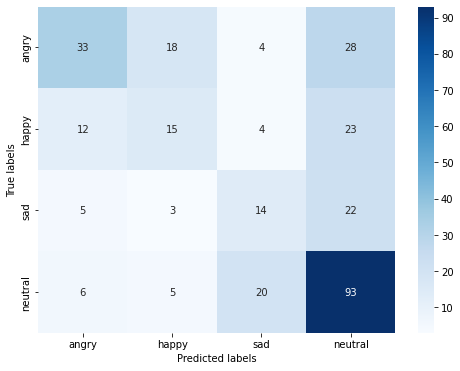

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class names
class_names = ['angry', 'happy', 'sad', 'neutral']
y_arg = np.argmax(y_arg, axis=1)
y_pred = np.argmax(y_pred, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_arg, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()